In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
image = cv2.imread('/Users/macbookvera/Downloads/Данные/Положение 0/1.bmp')

In [2]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.axis('off')

plt.show()


NameError: name 'image' is not defined

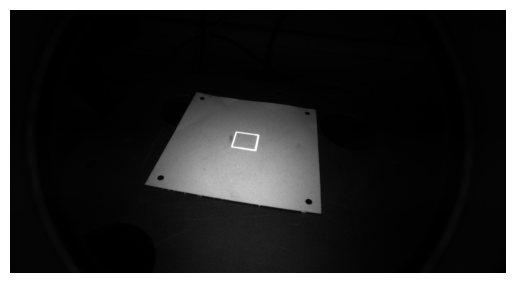

[]


(1088, 2048, 3)


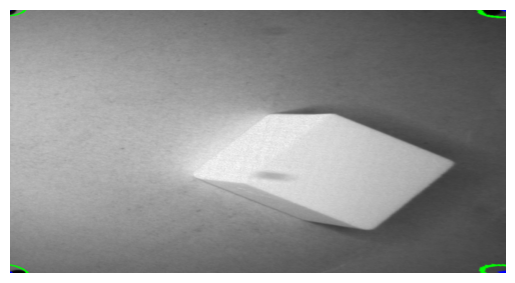

In [22]:
import cv2
import numpy as np

# Загрузка изображения (серое)
img = cv2.imread("/Users/macbookvera/Downloads/Данные/Положение 1/Image__2025-07-15__15-22-22.bmp", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Не удалось загрузить изображение")

# Немного размываем для снижения шума
img_blur = cv2.GaussianBlur(img, (9, 9), 2)

# Параметры для HoughCircles - подбери под свои данные
circles = cv2.HoughCircles(
    img_blur,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=15,
    param1=50,
    param2=15,   # снизил порог для большей чувствительности
    minRadius=5,
    maxRadius=30
)

img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

print(img_vis.shape)

# Списки для координат центров кругов
centers_x = []
centers_y = []

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        centers_x.append(x)
        centers_y.append(y)
        cv2.circle(img_vis, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img_vis, (x, y), 2, (0, 0, 255), 3)
tl = (centers_x[0], centers_y[0])
tr = (centers_x[1], centers_y[1])
bl = (centers_x[2], centers_y[2])
br = (centers_x[3], centers_y[3])
pts1 = np.float32([tl, tr, bl, br])
pts2 = np.float32([[0, 0], [0, 1088], [2048, 0], [2048, 1088]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(img_vis, matrix, (2048, 1088))


plt.imshow(warped)
plt.axis('off')

plt.show()



(1088, 2048, 3)


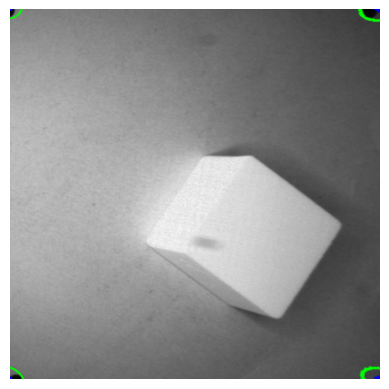

In [23]:
import cv2
import numpy as np

# Загрузка изображения (серое)
img = cv2.imread("/Users/macbookvera/Downloads/Данные/Положение 1/Image__2025-07-15__15-22-22.bmp", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Не удалось загрузить изображение")

# Немного размываем для снижения шума
img_blur = cv2.GaussianBlur(img, (9, 9), 2)

# Параметры для HoughCircles - подбери под свои данные
circles = cv2.HoughCircles(
    img_blur,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=15,
    param1=50,
    param2=15,   # снизил порог для большей чувствительности
    minRadius=5,
    maxRadius=30
)

img_vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

print(img_vis.shape)

# Списки для координат центров кругов
centers_x = []
centers_y = []

if circles is not None:
    circles = np.uint16(np.around(circles))
    for (x, y, r) in circles[0, :]:
        centers_x.append(x)
        centers_y.append(y)
        cv2.circle(img_vis, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img_vis, (x, y), 2, (0, 0, 255), 3)
tl = (centers_x[0], centers_y[0])
tr = (centers_x[1], centers_y[1])
bl = (centers_x[2], centers_y[2])
br = (centers_x[3], centers_y[3])
pts1 = np.float32([tl, tr, bl, br])
pts2 = np.float32([[0, 0], [0, 2048], [2048, 0], [2048, 2048]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
warped = cv2.warpPerspective(img_vis, matrix, (2048, 2048))


plt.imshow(warped)
plt.axis('off')

plt.show()
